<a href="https://colab.research.google.com/github/SivaTeja60/ML_Models/blob/master/PatientSurvivalAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [ ]:
import numpy as np # for array related operations
import pandas as pd # to read csv
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns # for visualisation

# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [ ]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()
pharma_data.isna().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

Fill Null values

In [ ]:
pharma_data_mod=pharma_data
pharma_data_mod['Treated_with_drugs']=pharma_data_mod['Treated_with_drugs'].astype('category')
pharma_data_mod['Treated_with_drugs'] = pharma_data_mod['Treated_with_drugs'].fillna(pharma_data_mod['Treated_with_drugs'].mode().iloc[0])
pharma_data_mod['A'] = pharma_data_mod['A'].fillna(pharma_data_mod['A'].mode().iloc[0])
pharma_data_mod['B'] = pharma_data_mod['B'].fillna(pharma_data_mod['B'].mode().iloc[0])
pharma_data_mod['C'] = pharma_data_mod['C'].fillna(pharma_data_mod['C'].mode().iloc[0])
pharma_data_mod['D'] = pharma_data_mod['D'].fillna(pharma_data_mod['D'].mode().iloc[0])
pharma_data_mod['E'] = pharma_data_mod['E'].fillna(pharma_data_mod['E'].mode().iloc[0])
pharma_data_mod['F'] = pharma_data_mod['F'].fillna(pharma_data_mod['F'].mode().iloc[0])
pharma_data_mod['Z'] = pharma_data_mod['Z'].fillna(pharma_data_mod['Z'].mode().iloc[0])
pharma_data_mod['Number_of_prev_cond'] = pharma_data_mod['Number_of_prev_cond'].fillna(pharma_data_mod['A']+pharma_data_mod['B']+pharma_data_mod['C']+pharma_data_mod['D']+pharma_data_mod['E']+pharma_data_mod['F']+pharma_data_mod['Z'])
pharma_data_mod.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,DX6,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


Created Dummies

In [ ]:
pharma_data_mod = pd.get_dummies(pharma_data_mod, columns=['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition'])
#pharma_data_mod['Treated_with_drugs'] =pharma_data_mod['Treated_with_drugs'].str.get_dummies(sep=' ')
pharma_data_mod=pd.concat([pharma_data_mod, pharma_data_mod['Treated_with_drugs'].str.get_dummies(sep=' ')],axis=1)
#pd.concat([df, df['col2'].str.get_dummies(sep=',')], axis=1)
pharma_data_mod.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,DX6,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,18164,5,5740,DX2,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,1,1,0,1,0,1,0,0,0,0
2,6283,23,10446,DX6,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,1,1,0,1,0,0,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,1,1,1,0,0,0,0,0
4,33012,0,12513,DX6,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,0,0,1,0,1,0,0,0,0,0,1


In [ ]:
pharma_data_mod=pharma_data_mod.drop(axis=1,columns='Treated_with_drugs')
pharma_data_mod=pharma_data_mod.drop(axis=1,columns='Patient_Smoker_Cannot say')
pharma_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Patient_Care_Situation        23097 non-null  int64  
 1   Diagnosed_Condition              23097 non-null  int64  
 2   Patient_ID                       23097 non-null  int64  
 3   Patient_Age                      23097 non-null  int64  
 4   Patient_Body_Mass_Index          23097 non-null  float64
 5   A                                23097 non-null  float64
 6   B                                23097 non-null  float64
 7   C                                23097 non-null  float64
 8   D                                23097 non-null  float64
 9   E                                23097 non-null  float64
 10  F                                23097 non-null  float64
 11  Z                                23097 non-null  float64
 12  Number_of_prev_con

Correlation Matrix

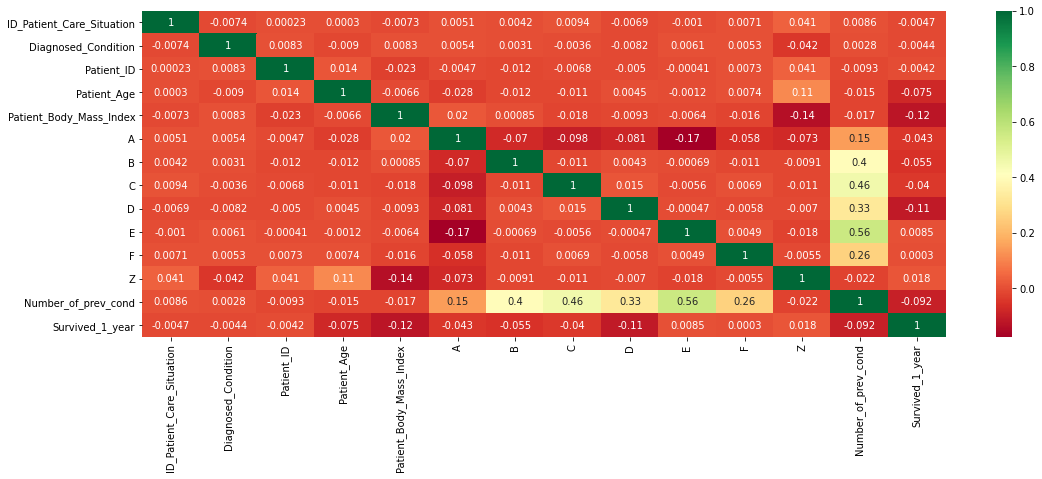

In [ ]:
corrmat = pharma_data.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [ ]:
#Test
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#pharma_data_mod.Treated_with_drugs = le.fit_transform(pharma_data_mod.Treated_with_drugs)
pharma_data_mod = pharma_data_mod.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
pharma_data_mod.Patient_Smoker = le.fit_transform(pharma_data_mod.Patient_Smoker)
pharma_data_mod.Patient_Rural_Urban = le.fit_transform(pharma_data_mod.Patient_Rural_Urban)
pharma_data_mod.Patient_mental_condition = le.fit_transform(pharma_data_mod.Patient_mental_condition)
pharma_data_mod.head()'''

Random Classifier Model Hyperparameter Tuning

In [ ]:
X = pharma_data_mod.drop('Survived_1_year', axis = 1) 
y = pharma_data_mod['Survived_1_year']

Train Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import f1_score

from mlxtend.feature_selection import SequentialFeatureSelector

feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),
           k_features=15,
           forward=True,
           verbose=2,
           scoring='f1',
           cv=4)

In [ ]:
features = feature_selector.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   51.5s finished

[2020-07-10 09:52:15] Features: 1/15 -- score: 0.7754413190918599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   43.1s finished

[2020-07-10 09:52:58] Features: 2/15 -- score: 0.7769695190148327[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   41.3s finished

[2020-07-10 09:53:39] Features: 3/15 -- score: 0.78000107297654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [ ]:
filtered_features= X_train.columns[list(features.k_feature_idx_)]
filtered_features

Index(['A', 'B', 'C', 'D', 'Z', 'Number_of_prev_cond', 'Patient_Smoker_NO',
       'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'Patient_mental_condition_Stable', 'DX1',
       'DX4', 'DX5', 'DX6'],
      dtype='object')

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=41, max_depth=3)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=41, verbose=0,
                       warm_start=False)

In [ ]:
clf_A=SelectFromModel(clf)
clf_A.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini', max_depth=3,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 ra

In [ ]:
X_important_train = clf_A.transform(X_train)
X_important_test = clf_A.transform(X_test)


In [ ]:
#test
clf_important = RandomForestClassifier(n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)


In [ ]:
y_pred = clf_important.predict(X_important_test)
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8265048052604959


In [ ]:
'''import pandas as pd


# import numpy for Scientific computations
import numpy as np


# import machine learning libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe'''



In [ ]:
'''space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }'''

In [ ]:
'''def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': accuracy, 'status': STATUS_OK }'''

In [ ]:
'''trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)'''

In [ ]:
'''print("The best hyperparameters are : ","\n")
print(best_hyperparams)'''

The best hyperparameters are :  

{'colsample_bytree': 0.8613132679805752, 'gamma': 2.302015811805117, 'max_depth': 9.0, 'min_child_weight': 7.0, 'reg_alpha': 180.0, 'reg_lambda': 0.14748405327465453}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)

Randomized search for Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [ ]:
RC_RS=RandomForestClassifier(bootstrap= False,
 max_depth= 80,
 max_features= 'sqrt',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 400)


In [ ]:
RC_RS.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = RC_RS.predict(X_test)
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8592321755027422


Grid Search for HyperTuning

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 24.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
RC_Gs=RandomForestClassifier(bootstrap= True,
 max_depth= 110,
 max_features= 3,
 min_samples_leaf= 3,
 min_samples_split= 18,
 n_estimators= 1000)

In [ ]:
RC_Gs.fit(X_train, y_train) 
  
# making predictions on the testing set 
y_pred = RC_Gs.predict(X_test)
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.8511056511056511


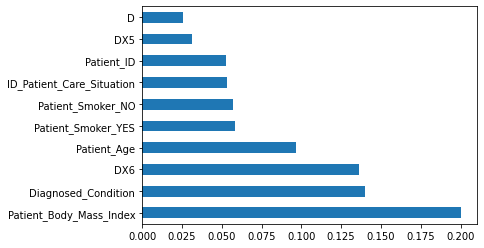

In [ ]:
#test
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(bootstrap= False,
 max_depth= 80,
 max_features= 'sqrt',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 400)
rf_clf.fit(X_train, y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#test
y_pred=rf_clf.predict(X_test)
from sklearn.metrics import f1_score
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.858664890960546


In [ ]:
#test
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf,threshold=0.15)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.13 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.13)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)

In [ ]:
#test
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [ ]:
#test
clf_important = RandomForestClassifier(bootstrap= False,
 max_depth= 80,
 max_features= 'sqrt',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 400)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

In [ ]:
#test
y_pred = clf_important.predict(X_important_test)
print("F1 Score: ",f1_score(y_test, y_pred))

F1 Score:  0.6999826479264273


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfF = rf_sfm()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfF_random = RandomizedSearchCV(estimator = rfF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfF_random.fit(X_train, y_train)

XGboost with HyperTuned Parameters

Feature Importances :  [0.         0.09207201 0.00470696 0.02879313 0.09093732 0.02757212
 0.00795877 0.00611246 0.02866493 0.         0.         0.
 0.01628029 0.13850692 0.14799035 0.04141878 0.05778658 0.
 0.00816454 0.         0.00297442 0.00400983 0.02203793 0.2740127 ]


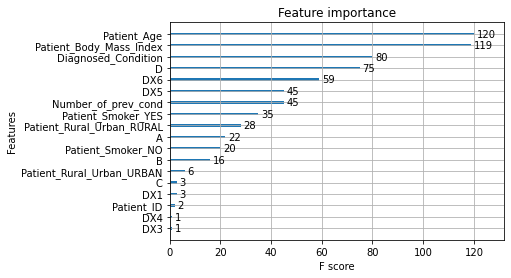

In [ ]:
'''from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model to training data
xgb_model = XGBClassifier(random_state = 0,colsample_bytree= 0.8613132679805752, gamma= 2.302015811805117, max_depth= 9, min_child_weight= 7.0, reg_alpha =180.0, reg_lambda= 0.14748405327465453 )
xgb_model.fit(X_train, y_train)

print("Feature Importances : ", xgb_model.feature_importances_)

# plot feature importance
plot_importance(xgb_model)
plt.show()'''

In [ ]:
#test
'''selection = SelectFromModel(xgb_model)
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_model = XGBClassifier(random_state = 0,colsample_bytree= 0.8613132679805752, gamma= 2.302015811805117, max_depth= 9, min_child_weight= 7.0, reg_alpha =180.0, reg_lambda= 0.14748405327465453)
selection_model.fit(select_X_train, y_train)'''

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8613132679805752,
              gamma=2.302015811805117, learning_rate=0.1, max_delta_step=0,
              max_depth=9, min_child_weight=7.0, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=180.0, reg_lambda=0.14748405327465453,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              verbosity=1)

In [ ]:
'''y_pred = xgb_model.predict(X_test)
xgb_fscore = f1_score(y_test ,y_pred)
print("XGB Baseline Model F1 Score:", xgb_fscore)'''

XGB Baseline Model F1 Score: 0.8597122302158272


In [ ]:
#test
'''predictions = selection_model.predict(select_X_test)
xgb_fscore = f1_score(y_test , predictions)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

Limited Features XGBoost Model F1 Score: 0.8361083904668626


Load New DataSet

In [ ]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

Create Dummies

In [ ]:
test_new['Treated_with_drugs']=test_new['Treated_with_drugs'].astype('category')

In [ ]:
test_new = pd.get_dummies(test_new, columns=['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition'])
#pharma_data_mod['Treated_with_drugs'] =pharma_data_mod['Treated_with_drugs'].str.get_dummies(sep=' ')
test_new=pd.concat([test_new, test_new['Treated_with_drugs'].str.get_dummies(sep=' ')],axis=1)
#pd.concat([df, df['col2'].str.get_dummies(sep=',')], axis=1)
test_new=test_new.drop(axis=1,columns='Treated_with_drugs')
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable,DX1,DX2,DX3,DX4,DX5,DX6
0,19150,40,3709,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,1,0,0,0
1,23216,52,986,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1,0,0,1,1,0,0,0,0,0,1
2,11890,50,11821,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0,1,0,0,0,1,1,0
3,7149,32,3292,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1,0,0,1,1,0,0,0,0,0,1
4,22845,20,9959,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,1,0,0,1,0,0,0


In [ ]:
#test
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#pharma_data_mod.Treated_with_drugs = le.fit_transform(pharma_data_mod.Treated_with_drugs)
test_new = test_new.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

test_new.head()
test_new.info()

In [ ]:
#test
#rf_clf.fit(test_new,Survived_1_year)
#Survived_1_year = rf_clf.predict(test_new)


In [ ]:
#test
test_data=rf_sfm.transform(test_new)
#clf_important.fit(test_new,Survived_1_year)
Survived_1_year = clf_important.predict(test_data)

Predict output using HyperTuned RC Classifier

In [ ]:
Survived_1_year = RC_RS.predict(test_new)

Predict the O/P

In [ ]:
'''test_new = test_new[X_train.columns]
Survived_1_year = xgb_model.predict(test_new)'''

In [ ]:
'''test_data=selection.transform(test_new)
#selection_model.fit(test_new,Survived_1_year)
#test_data = test_data[X_train.columns]
Survived_1_year = selection_model.predict(test_data)


Download Predictions

In [ ]:
res=pd.DataFrame(Survived_1_year)
res.index=test_new.index
res.columns=["Survived_1_year"]

In [ ]:
from google.colab import files
res.to_csv('prediciton_results_Liv.csv')
files.download('prediciton_results_Liv.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>